# Covid model
This project is for WAMM 2021 done by Hinda Nguyen and Katie Johnston

In [33]:
#import libraries that might be useful
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

In [34]:
#define some variables that will be useful
total_pop = 1e6 #how many people in our population
people = [total_pop - 1, 1, 0] #total number of people in each group, S I R

people_interact = 10#total_pop*.2 #how many people everyone interacts with everyday
infect_chance = 0.5 #chance get infected after interaction
days_infectious = 10 #number of days an infected person can infect other people

##what other variables might we need

In [35]:
def one_day(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    for i in range(int(people[1])):
        for n in range(int(people_interact)):
            rand = random.random()
            if( rand < people[0]/total_pop): #suspetible person
#                 coin_toss=random.randint(0,1)
                if random.random() < infect_chance:
#                 if coin_toss==1:
                    people[0]-=1
                    people[1]+=1
#                 else:
#                     people[0]-=0                
#                     people[1]+=0
#             else: #infected
#                 pass
    #could change people array as needed for new number of infections, ... or make new variable
    print(people)
    return people

#what are some other functions that might be useful for our simulation

In [36]:
people = [total_pop - 1, 1, 0]
people_infected=[]#np.zeros((14))
def fourteen_days(people):#runs 14 days of simulation and stores number of infected people in an array
    for n in range(14):
        one_day(people)
        people_infected.append(people[1])
        if(people_infected[n] == total_pop): #if everyone gets infected stop
            return people_infected
    return people_infected
# print(fourteen_days(people))
people_infected = fourteen_days(people)
print(people_infected)
        

[999993.0, 7, 0]
[999955.0, 45, 0]
[999723.0, 277, 0]
[998305.0, 1695, 0]
[989820.0, 10180, 0]
[940762.0, 59238, 0]
[699956.0, 300044, 0]
[156843.0, 843157, 0]
[2301.0, 997699, 0]
[12.0, 999988, 0]
[0.0, 1000000, 0]
[7, 45, 277, 1695, 10180, 59238, 300044, 843157, 997699, 999988, 1000000]


In [37]:
people = [total_pop - 1, 1, 0]
people_infected_ideal = []#=np.zeros((14))
def fourteen_days_ideal(people):#runs 14 days of simulation and stores number of infected people in an array
    for n in range(14):
        one_day_ideal(people)
        people_infected_ideal.append(people[1])
        if(people_infected_ideal[n] > total_pop): #if everyone gets infected stop
            return people_infected_ideal
    return people_infected_ideal
# print(fourteen_days(people))
people_infected_ideal = fourteen_days(people)
print(people_infected)

[999995.0, 5, 0]
[999970.0, 30, 0]
[999819.0, 181, 0]
[998932.0, 1068, 0]
[993596.0, 6404, 0]
[962462.0, 37538, 0]
[797749.0, 202251, 0]
[289935.0, 710065, 0]
[8456.0, 991544, 0]
[54.0, 999946, 0]
[0.0, 1000000, 0]
[7, 45, 277, 1695, 10180, 59238, 300044, 843157, 997699, 999988, 1000000, 5, 30, 181, 1068, 6404, 37538, 202251, 710065, 991544, 999946, 1000000]


In [38]:
#ideas for shifting array and then adding new value
people_recovered=np.zeros((days_infectious))

#want number of people infected each day
people_infected_copy= np.zeros(np.array(people_infected).shape)
people_infected_copy[0] = people_infected[0]
people_infected_copy[1:] = np.array(people_infected[1:])- np.array(people_infected[:-1])

# print(people_infected[:-1])
# print(people_infected[1:])
# print(people_infected_copy)
for n in range(len(people_infected)): 
    people_recovered=np.append(people_recovered,people_infected_copy[0]) #adds the first value in people_infected to people_recovered
    people_infected_copy=np.roll(people_infected_copy,-1) #shifts everything in people_infected left
    people_infected_copy[-1]=0 #zero is where the new value would be
print(people_infected_copy)
print(people_recovered)
print(people_infected)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
  7.00000e+00  3.80000e+01  2.32000e+02  1.41800e+03  8.48500e+03
  4.90580e+04  2.40806e+05  5.43113e+05  1.54542e+05  2.28900e+03
  1.20000e+01 -9.99995e+05  2.50000e+01  1.51000e+02  8.87000e+02
  5.33600e+03  3.11340e+04  1.64713e+05  5.07814e+05  2.81479e+05
  8.40200e+03  5.40000e+01]
[7, 45, 277, 1695, 10180, 59238, 300044, 843157, 997699, 999988, 1000000, 5, 30, 181, 1068, 6404, 37538, 202251, 710065, 991544, 999946, 1000000]


In [41]:
#ideas for combining fourteen_days and people_recovered
people = [total_pop - 1, 1, 0]
people_infected=[]#np.zeros((14))
people_recovered=np.zeros((days_infectious))
def fourteen_days(people):#runs 14 days of simulation and stores number of infected people in an array
    for n in range(14):
        one_day(people)
        people_infected.append(people[1])
        if(people_infected[n] == total_pop): #if everyone gets infected stop
            return people_infected
        for n in range(len(people_infected)): 
            np.append(people_recovered,people_infected_copy[0]) #adds the first value in people_infected to people_recovered
            np.roll(people_infected_copy,-1) #shifts everything in people_infected left
            people_infected_copy[-1]=0 #zero is where the new value would be
        return people_infected
# print(fourteen_days(people))
people_infected = fourteen_days(people)
print(people_infected)

[999993.0, 7, 0]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
plt.plot(people_infected, label = "infected")
plt.plot(people_infected_ideal, label = "infected ideal")
plt.plot(total_pop - np.array(people_infected), label = "suspetible")
plt.legend()
plt.plot(people_recovered)

In [11]:
def one_day_ideal(people):
    #Run 1 day of simulation
    #people will interact with people_interact number of people and then may or may not be infected
    infected = people[1]
    sus = people[0]
    people[0]-=people_interact*infect_chance*infected*sus/total_pop
    people[1]+=people_interact*infect_chance*infected*sus/total_pop
    #could change people array as needed for new number of infections, ... or make new variable
    return people

#what are some other functions that might be useful for our simulation

5.0


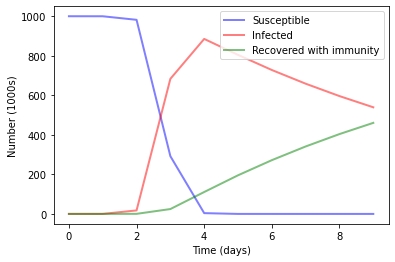

In [12]:
#taken from https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

# Total population, N.
N = total_pop
t_max = 10
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta = people_interact*infect_chance#people_interact/total_pop
print(beta)
gamma = 1./days_infectious
# A grid of time points (in days)
t = np.arange(0,t_max, 1)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure()
plt.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
plt.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
plt.xlabel('Time (days)')
plt.ylabel('Number (1000s)')
plt.legend()
plt.show()